<a href="https://colab.research.google.com/github/715Bisan/TECH-405_Week-4_11-19-2024-/blob/main/week_4_Tech_405.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [24]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [27]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [28]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


In [53]:
X_test

array([[[[0.4627451 , 0.32156863, 0.37647059],
         [0.42745098, 0.27843137, 0.32156863],
         [0.45490196, 0.30196078, 0.30588235],
         ...,
         [0.66666667, 0.5254902 , 0.39215686],
         [0.64705882, 0.50588235, 0.36470588],
         [0.63921569, 0.49803922, 0.35686275]],

        [[0.37254902, 0.24313725, 0.28627451],
         [0.40784314, 0.27058824, 0.29803922],
         [0.43137255, 0.29411765, 0.28627451],
         ...,
         [0.68235294, 0.54117647, 0.4       ],
         [0.66666667, 0.5254902 , 0.38431373],
         [0.65490196, 0.51764706, 0.36862745]],

        [[0.69411765, 0.58039216, 0.6       ],
         [0.70980392, 0.59215686, 0.6       ],
         [0.67843137, 0.55686275, 0.5372549 ],
         ...,
         [0.68627451, 0.55294118, 0.40392157],
         [0.67058824, 0.5372549 , 0.38823529],
         [0.65882353, 0.52941176, 0.36862745]],

        ...,

        [[0.24705882, 0.23529412, 0.30196078],
         [0.25490196, 0.25098039, 0.31372549]

In [54]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

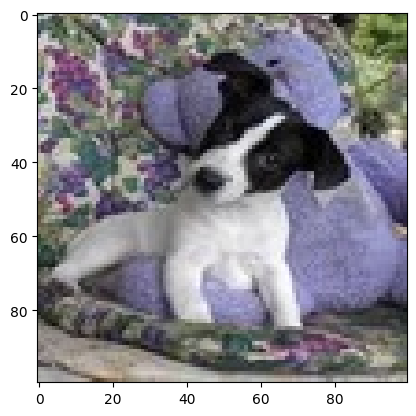

In [55]:
import matplotlib.pyplot as plt
plt.imshow(X_train[10])

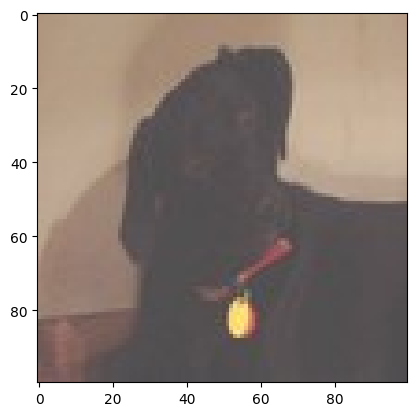

In [29]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [30]:
model = Sequential()

In [31]:
model.add(Conv2D(32,kernel_size=(3,3), padding='valid', activation='relu', input_shape=(28,28,1) ))
model.add(Conv2D(32,kernel_size=(3,3), padding='valid',activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3), padding='valid',activation='relu'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='relu'))

In [32]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 22, 22, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 15488)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       1,982,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,002,698 (7.64 MB)

 Trainable params: 2,002,698 (7.64 MB)

 Non-trainable params: 0 (0.00 B)

# **##With padding=same**

In [33]:

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1) ))
model.add(Conv2D(32,kernel_size=(3,3), padding='same',activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3), padding='same',activation='relu'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='relu'))


In [34]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,231,498 (12.33 MB)

 Trainable params: 3,231,498 (12.33 MB)

 Non-trainable params: 0 (0.00 B)

# **using stride**

In [35]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), padding='same', strides = (2,2), activation='relu', input_shape=(28,28,1) ))
model.add(Conv2D(32,kernel_size=(3,3), padding='same',strides = (2,2),activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3), padding='same',strides = (2,2),activation='relu'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='relu'))


In [36]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 14, 14, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 7, 7, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 4, 4, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 85,770 (335.04 KB)

 Trainable params: 85,770 (335.04 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
from keras.layers import MaxPooling2D
model = Sequential()

In [38]:
model.add(Conv2D(32,kernel_size=(3,3), padding='valid', activation='relu', input_shape=(28,28,1) ))
model.add(MaxPooling2D(pool_size=(2,2), strides=1, padding='valid'))
model.add(Conv2D(32,kernel_size=(3,3), padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=1, padding='valid'))
model.add(Conv2D(32,kernel_size=(3,3), padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=1, padding='valid'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))


In [39]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 25, 25, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 23, 23, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 22, 22, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 20, 20, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 19, 19, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 11552)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │       1,478,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,498,890 (5.72 MB)

 Trainable params: 1,498,890 (5.72 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
#reshape data to fit model
X_train = X_train.reshape(2000, 100, 100, 3)
X_test = X_test.reshape(400, 100, 100, 3)

In [44]:
model = Sequential()

In [56]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_train.shape

(50000, 10)

In [94]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2000, 100, 100, 3)
y_train shape: (50000, 10)
X_test shape: (400, 100, 100, 3)
y_test shape: (10000, 10)


In [95]:
# Adjust y_train to match the number of samples in X_train
y_train = y_train[:X_train.shape[0]]

# Adjust y_test to match the number of samples in X_test
y_test = y_test[:X_test.shape[0]]

# Check the shapes again to confirm
print(f"Adjusted y_train shape: {y_train.shape}")
print(f"Adjusted y_test shape: {y_test.shape}")


Adjusted y_train shape: (2000, 10)
Adjusted y_test shape: (400, 10)


In [101]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load data
X_train = np.loadtxt('input.csv', delimiter=',')
y_train = np.loadtxt('labels.csv', delimiter=',')
X_test = np.loadtxt('input_test.csv', delimiter=',')
y_test = np.loadtxt('labels_test.csv', delimiter=',')

# Reshape the data
X_train = X_train.reshape(-1, 100, 100, 3)
X_test = X_test.reshape(-1, 100, 100, 3)

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Ensure the labels are integers before one-hot encoding
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Check the data shapes
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Build the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)


X_train shape: (2000, 100, 100, 3)
y_train shape: (2000, 10)
X_test shape: (400, 100, 100, 3)
y_test shape: (400, 10)
Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.4498 - loss: 1.0290 - val_accuracy: 0.5925 - val_loss: 0.6788
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.5948 - loss: 0.6715 - val_accuracy: 0.6650 - val_loss: 0.6215
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.6663 - loss: 0.6172 - val_accuracy: 0.6800 - val_loss: 0.5977
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.7166 - loss: 0.5503 - val_accuracy: 0.6375 - val_loss: 0.6147
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.7183 - loss: 0.5352 - val_accuracy: 0.6400 - val_loss: 0.6272


In [102]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

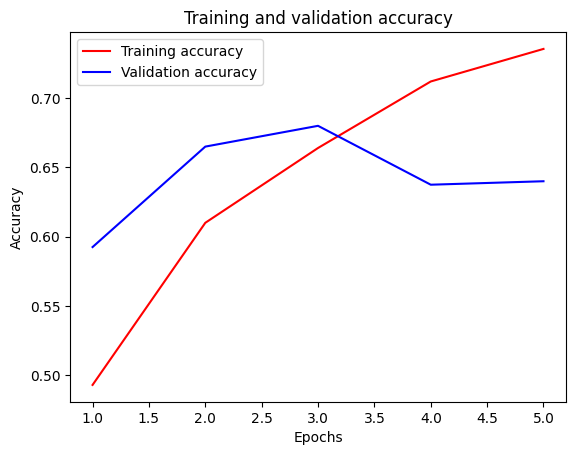

In [103]:
import matplotlib.pyplot as plt
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Making **prediction**

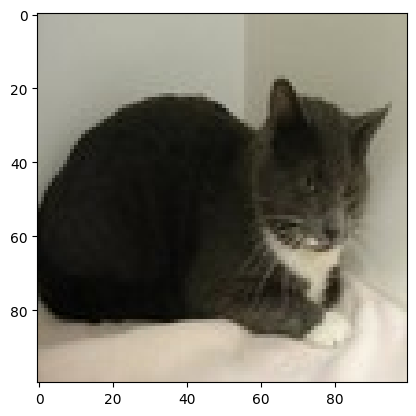

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Our model says it is a: cat


In [112]:
# Select a random index for prediction
idx2 = random.randint(0, len(Y_test) - 1)

# Display the image
plt.imshow(X_test[idx2])
plt.show()

# Make a prediction using the model
y_pred = model.predict(X_test[idx2].reshape(1, 100, 100, 3))

# Get the class with the highest probability
predicted_class = np.argmax(y_pred)

# Define class labels (assuming class 0 is 'dog' and class 1 is 'cat', etc.)
class_labels = ['dog', 'cat', 'car', 'bird', 'fish', 'flower', 'apple', 'banana', 'grape', 'plane']

# Print the predicted class
print(f"Our model says it is a: {class_labels[predicted_class]}")


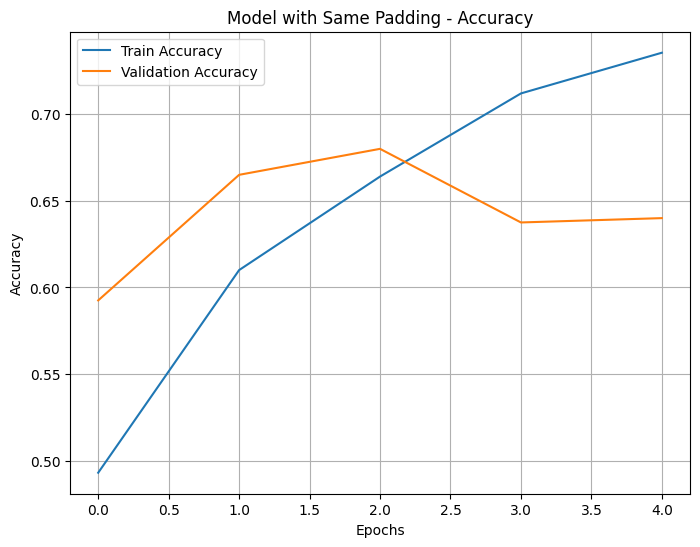

In [116]:
import matplotlib.pyplot as plt

# Function to plot training and validation accuracy
def plot_accuracy(history, model_name):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot for Model with 'same' padding
plot_accuracy(history, 'Model with Same Padding')

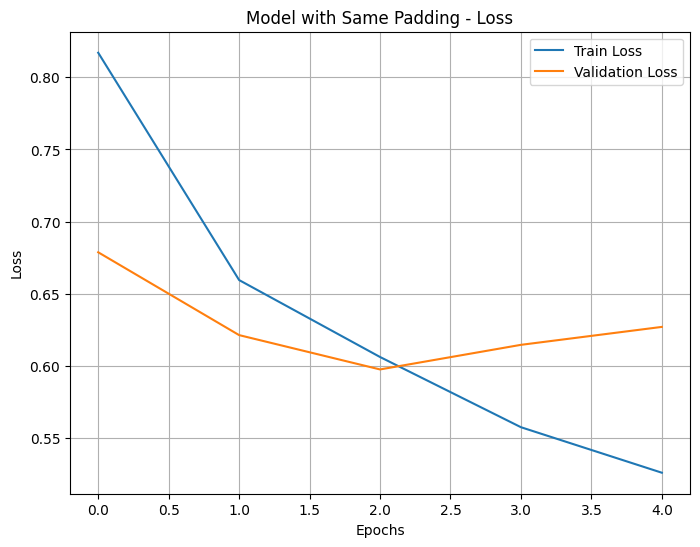

In [113]:
# Function to plot training and validation loss
def plot_loss(history, model_name):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot for Model with 'same' padding
plot_loss(history, 'Model with Same Padding')

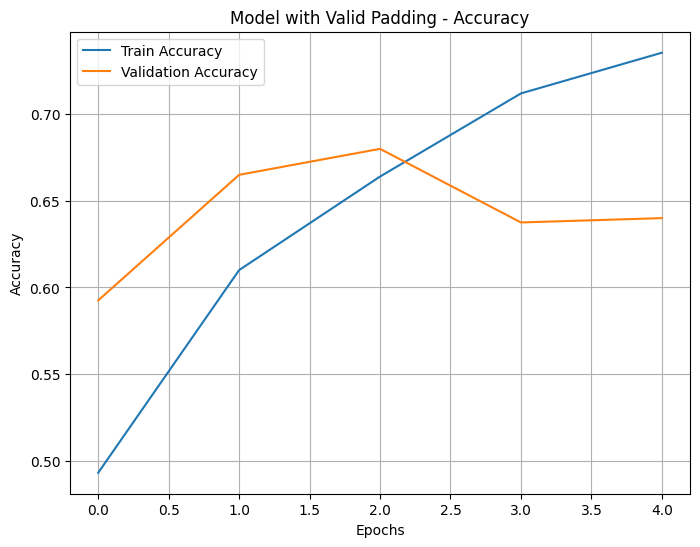

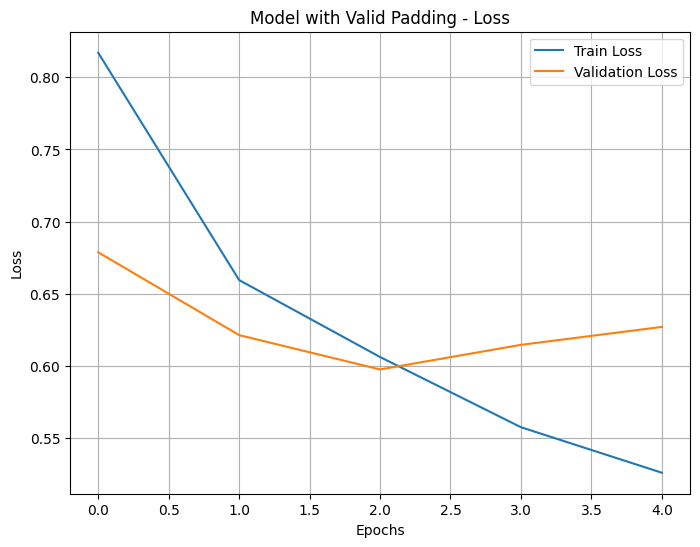

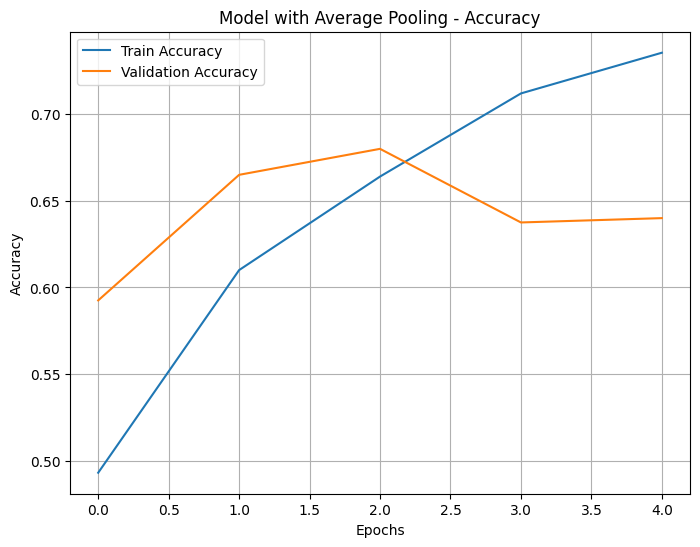

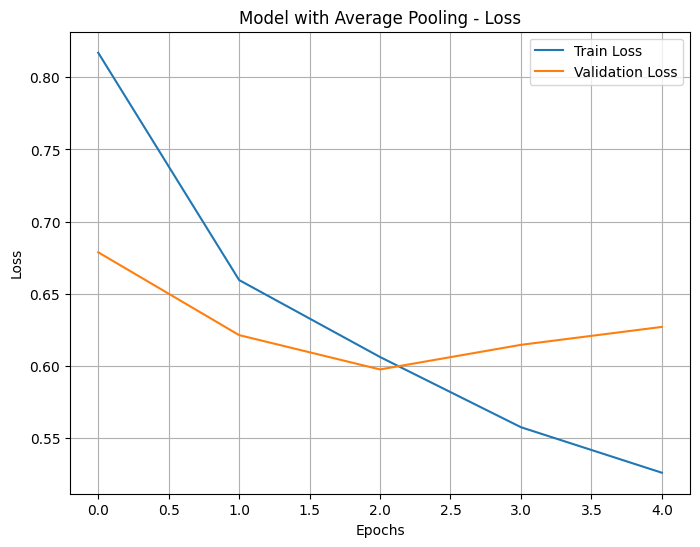

In [117]:
# Plot for Model with 'valid' padding
plot_accuracy(history, 'Model with Valid Padding')
plot_loss(history, 'Model with Valid Padding')

# Plot for Model with Average Pooling
plot_accuracy(history, 'Model with Average Pooling')
plot_loss(history, 'Model with Average Pooling')
